#**ANALISIS SENTIMEN TWITTER TERHADAP KULIAH ONLINE MENGGUNAKAN METODE BERT PYTHON**

KELOMPOK 4 :
1. Ida Ayu Oka Dewi Cahyani - LINAC
2. Yudha Mansoba - LINAC
3. Muh. Ikram Kamal - LINAC
4. Suriani - LINAC

Metode **BERT** adalah metode yang digunakan oleh google yang berbasis neural network yang dapat digunakan untuk proses pencarian data. Algoritma ini sudah digunakan oleh google semenjak tahun lalu atau lebih tepatnya sejak 21 Oktober 2021.

Algoritma **BERT** digunakan pada pre-training Natural Language Processing (**NLP**), dimana mesin dapat belajar dan meningkatkan kemampuannya dalam proses identifikasi kata. Jaringan ANN ini akan terus belajar dan tentunya hasil yang ditampilkan akan semakin bagus.


***NB : dimohon untuk runtime menggunakan GPU***

#IMPORT LIBRARIES

Proses **import libraries** adalah proses untuk menginputkan librari apa saja yang akan digunakan dalam proses analisis sentimen ini.Tapi tidak menutup kemungkinan di bawah ini kami akan menginputkan libraries lainnya karena malas untuk kembali ke atas.

In [ ]:
# INSTALL TENSORFLOW BUAT PROSES BERT
!pip install -q -U tensorflow-text

In [ ]:
# INSTALL MODEL DARI TENSORFLOW
!pip install -q tf-models-official

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import shutil
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # Digunakan untuk create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

##DATA ACQUISITION

pengambilan data yang dilakukan adalah dengan mengambil data dari sentimen masyarakat Indonesia dalam sebuah dataset yang sudah bersih yang kita ambil dari kaggle. *Review Lapak Sentiment on Kaggle https://www.kaggle.com/datasets/christofel04/review-lapak-sentiment?utm_medium=social&utm_campaign=kaggle-dataset-share&utm_source=twitter*. Data ini nantinya yang akan dijadikan acuan oleh metode **BERT** yang kami gunakan untuk belajar mengenai sentimen dengan bahasa indonesia. sehingga setelah komputer belajar dengan dataset ini komputer dapat menentukan kata tersebut masuk ke dalam sentimen yang mana.

In [ ]:
!kaggle datasets download -d christofel04/review-lapak-sentiment

  0% 0.00/2.74M [00:00<?, ?B/s]
100% 2.74M/2.74M [00:00<00:00, 60.5MB/s]


In [ ]:
!unzip '/content/review-lapak-sentiment.zip' -d '/content/drive/MyDrive/review-lapak-sentiment'

Archive:  /content/review-lapak-sentiment.zip
  inflating: /content/drive/MyDrive/review-lapak-sentiment/train.csv  


In [ ]:
#READ CSV YANG UDAH DI DOWNLOAD DARI KAGGLE DAN DI UNZIP DI DRIVE

df = pd.read_csv('/content/drive/MyDrive/review-lapak-sentiment/train.csv')
df

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


##PRE PROCESSING

**Pre- Processing** yang dilakukan disini adalah untuk menyiapkan data yang digunakan, walau data diambil data yang sudah bersih tapi kita harus menyiapkan data agar sesuai dengan apa yang kita inginkan. Adapun proses **pre-processing** data adalah sebagai berikut.

In [ ]:
df

,id,header_review,review_sangat_singkat,label
0,0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,1,Mantaps.....,Mantaps.....,1
2,2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,3,Barang Asli,Barang asli,1
4,4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...,...,...
96324,96324,Sesuai Pesanan,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,96325,Biasa Saja,barangnya sesuai dengan harganya thanks sda di...,1
96326,96326,Okeexxxxxxxxxxxxxxx,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,96327,Barang Cepat Sampai Dan Bagus. Makasih Yaa...,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


In [ ]:
#MENGHAPUS KOLOM YANG TIDAK DIPERLUKAN

df.drop(columns=['id', 'header_review'], axis=0, inplace=True)
df

,review_sangat_singkat,label
0,mantap barang sesuai pesanan,1
1,Mantaps.....,1
2,Terima kasih buka lapaklapak barang sesuai den...,1
3,Barang asli,1
4,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...
96324,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,barangnya sesuai dengan harganya thanks sda di...,1
96326,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


In [ ]:
#PROSES RENAME NAMA KOLOM AGAR LEBIH MUDAH UNTUK MEMANGGILNYA

df.rename(columns={'review_sangat_singkat': 'Text Tweet', 'label': 'Sentiment'}, inplace=True)
df

,Text Tweet,Sentiment
0,mantap barang sesuai pesanan,1
1,Mantaps.....,1
2,Terima kasih buka lapaklapak barang sesuai den...,1
3,Barang asli,1
4,Packing rapih barang sesuai pesanan dan ce...,1
...,...,...
96324,"sudah sampai, blm dicoba,semoga bermanfaat",1
96325,barangnya sesuai dengan harganya thanks sda di...,1
96326,okeexxxxkkkkkkkkkkkkkkkkkkssss,1
96327,Respon nya bagus ramah. Barang cpt sampai. Mak...,1


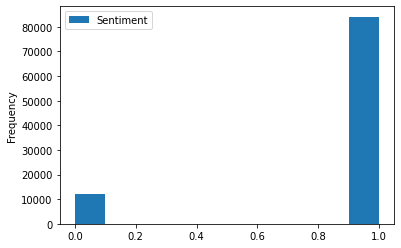

In [ ]:
#MENAMPILKAN BANYAK DATA DENGAN LABEL POSITIF DAN NEGATIF PADA DATASET
df.plot(kind='hist')

In [ ]:
df.dtypes

Text Tweet    object
Sentiment      int64
dtype: object

### Split Dataset

Proses **Split Dataset** ini adalah untuk memisahkan data yaitu data yang akan digunakan untuk training atau belajar maupun data yang akan digunakan untuk validasi atau data test. untuk perbandingan yang digunakan nantinya adalah 70% data untuk *Train* dan 30% untuk *Test*

In [ ]:
from sklearn.model_selection import train_test_split


train_dataset, test_dataset = train_test_split(df, train_size=0.07, test_size=0.03, random_state=42, stratify=df['Sentiment'].values)
# train_dataset, test_dataset = train_test_split(df_2, train_size=0.7, test_size=0.3, random_state=42, stratify=df_2['Sentiment'].values)

x_train, x_valid, y_train, y_valid = train_test_split(train_dataset['Text Tweet'],
                                                      train_dataset['Sentiment'],
                                                      train_size = 0.7,
                                                      random_state=42,
                                                      stratify=train_dataset.Sentiment.values)

# x_train, x_test, y_train, y_test = train_test_split(df['Text Tweet'], df['Sentiment'], train_size=0.75, random_state=42, stratify=df.Sentiment.values)

In [ ]:
print(f'x_train : {x_train.shape}\ny_train : {y_train.shape}')
print(f'x_valid : {x_valid.shape}\ny_valid : {y_valid.shape}')

x_train : (4720,)
y_train : (4720,)
x_valid : (2023,)
y_valid : (2023,)


###Shuffle isi Dataset

Proses **Shuffle isi dataset** adalah proses untuk mengacak data training dan data valid yang sudah dibagi sebelumnya dengan menggunakan tensorflow

In [ ]:
train_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_train, y_train))
                 .shuffle(1000)
                 .batch(32, drop_remainder=True)
                 .prefetch(tf.data.experimental.AUTOTUNE))

valid_dataset = (tf.data.Dataset
                 .from_tensor_slices((x_valid, y_valid))
                 .batch(32, drop_remainder=True)
                 .cache()
                 .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
print(len(train_dataset))

147


In [ ]:
print(len(valid_dataset))

63


In [ ]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>


## Load **BERT** Model

Sebelumnya mohon maaf coach, kebawah sini akan semakin berat perjalanannya karena bakal lama trainingnya, jadi dimohon untuk runtime dengan GPU.

Proses ini adalah proses untuk load **BERT** Model untuk modelnya sendiri ini saya mengambil contoh dari *https://tensorflow.org/text/tutorials/classify_text_with_bert*

In [ ]:
bert_model_name = 'bert_multi_cased_L-12_H-768_A-12'

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3


## Preprocessing Model

Proses **Pre-processing model** adalah melakukan proses pre-pro pada model untuk menyiapkan model untuk membangun model yang sebenarnya.

In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
text_test = ['Film ini sangat bagus!']
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_mask', 'input_type_ids', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [  101 11162 10592 20365 56332 10251   106   102     0     0     0     0]
Input Mask : [1 1 1 1 1 1 1 1 0 0 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


## Using the BERT Model

In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[ 0.45931336 -0.13041389  0.15607256 -0.19542891 -0.22146507  0.3212837
  0.16080926  0.26015863 -0.55123734  0.31767276  0.11830855 -0.19269656]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[-0.06184591 -0.2341877  -0.15245855 ...  0.49455866  0.35491356
   0.3808462 ]
 [ 0.04715431 -0.55776024  0.1263954  ...  0.7607765   0.43623546
   0.65822023]
 [ 0.03039942 -0.72707474  0.04525122 ...  0.79153645  0.23796399
   0.85483354]
 ...
 [-0.2332578  -0.5979481  -0.07628432 ...  0.6851059   0.4821799
   0.627151  ]
 [-0.1760354  -0.77929723 -0.03565159 ...  0.6465674   0.37006482
   0.5649848 ]
 [-0.17922145 -0.7920646  -0.02997091 ...  0.63858473  0.36413416
   0.5588796 ]]


## Define Model

proses **Define Model** ini adalah proses untuk mendefinisikan model yang akan digunakan menggunakan keras yang digunakan untuk membuat model Neural Network.

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.56807303]], shape=(1, 1), dtype=float32)


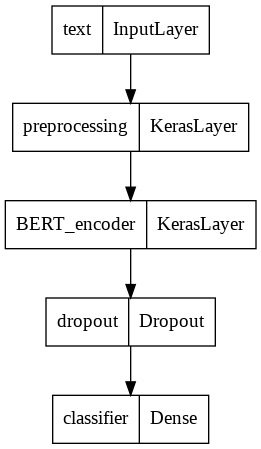

In [ ]:
tf.keras.utils.plot_model(classifier_model)

## Model Training

Adventure will be start in here coach.

Proses **model training** ini adalah untuk training data menggunakan model **BERT** yang sudah dibuat.

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [ ]:
epochs = 2
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

# untuk epochnya digunakan 2 karena pada proses sebelumnya menggunakan akun
# google saya (oka dewi) yang satu lagi, dan yuda epoch jauh diatas 1.75 terjadi
# overfitting jadinya saya pilih yg terdekat

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [ ]:
# semangat coach :')

print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_dataset,
                               validation_data=valid_dataset,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3
Epoch 1/2
147/147 [==============================] - 312s 2s/step - loss: 0.3485 - binary_accuracy: 0.8374 - val_loss: 0.2601 - val_binary_accuracy: 0.8760
Epoch 2/2
147/147 [==============================] - 287s 2s/step - loss: 0.2265 - binary_accuracy: 0.8997 - val_loss: 0.2683 - val_binary_accuracy: 0.8785


# Evaluate the Model

proses ini dilakukan untuk mengevaluasi model yang sudah dibuat. apakah model yang sudah dibuat tersebut good fit, atau malah overfitting maupun underfitting.

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


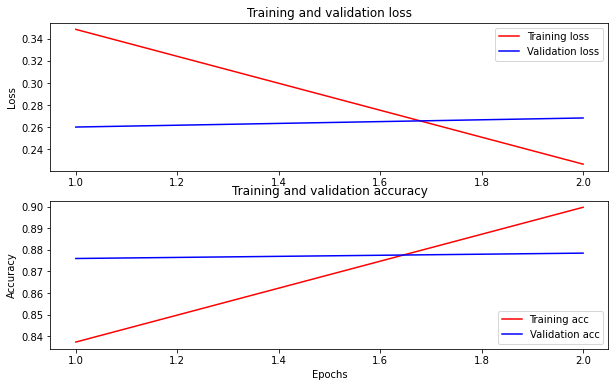

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

pada hasil evaluasi model yang sudah dibuat ini terjadi overfitting karena harusnya epochnya berhenti di 1,75 tapi karena epoch tidak boleh float sehingga digunakan epoch 2 saja. dan jika jauh lebih besar misalnya 5 epochs akan tetap overfitting

berikutnya adalah proses untuk cek akurasi dan loss pada saat epoch tadi. dapat dilihat dibawah ini jika akurasinya sebesar **93%**

In [ ]:
loss, accuracy = classifier_model.evaluate(train_dataset)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

147/147 [==============================] - 90s 610ms/step - loss: 0.1635 - binary_accuracy: 0.9301
Loss: 0.16351623833179474
Accuracy: 0.930059552192688


# Export for inference

Proses ini adalah untuk mengecek sentimen dari kata-kata manakah yang termasuk sentimen negatif maupun positif. Adapun sesuai yang sudah dipelajari tadi

In [ ]:
dataset_name = 'ripiu'
saved_model_path = './{}_bert'.format(dataset_name.replace('/', '_'))

classifier_model.save(saved_model_path, include_optimizer=False)

jangan lupa save model biar tidak hilang xixixi :)

In [ ]:
reloaded_model = tf.saved_model.load(saved_model_path)

In [ ]:
def print_my_examples(inputs, results):
  result_for_printing = \
    [f'input: {inputs[i]:<30} : score: {results[i][0]:.6f}'
                         for i in range(len(inputs))]
  print(*result_for_printing, sep='\n')
  print()


examples = [
    'Suka banget sama filmnya',
    'Jelek ah gak suka',
    'Aku suka filmnya, di beberapa bagian keren. tapi kayaknya masih bisa dikembangkan'
]

reloaded_results = tf.sigmoid(reloaded_model(tf.constant(examples)))
original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

print('Results from the saved model:')
print_my_examples(examples, reloaded_results)
print('Results from the model in memory:')
print_my_examples(examples, original_results)

Results from the saved model:
input: Suka banget sama filmnya       : score: 0.988196
input: Jelek ah gak suka              : score: 0.394236
input: Aku suka filmnya, di beberapa bagian keren. tapi kayaknya masih bisa dikembangkan : score: 0.988900

Results from the model in memory:
input: Suka banget sama filmnya       : score: 0.988196
input: Jelek ah gak suka              : score: 0.394236
input: Aku suka filmnya, di beberapa bagian keren. tapi kayaknya masih bisa dikembangkan : score: 0.988900



In [ ]:
examples = [
    'Aku suka dia',
    'jelek',
    'gak nyangka sih'
]

original_results = tf.sigmoid(classifier_model(tf.constant(examples)))

def prediksi(result):
  for i in range(len(result)):
    print(f'Score : {result[i][0]:.6f}')
    if result[i][0] > 0.6:
      print('Label : Positif')
    elif result[i][0] <= 0.6 and result[i][0] > 0.2:
      print('Label : Netral')
    else:
      print('Label : Negatif')

    print()

prediksi(original_results)

Score : 0.984372
Label : Positif

Score : 0.157818
Label : Negatif

Score : 0.446011
Label : Netral



##CONCLUSION

dapat dilihat dari hasil diatas jika di explore lebih lagi akan terjadi penyelewengan, kenapa begitu karena datasetnya. Dari dataset tersebut labeling datanya tentunya banyak yang kata negatif menjadi respon yang positif jadi saat kita search kata yang negatif yang memiliki maksud negatif akan terdeteksi netral maupun negatif. jadi program ini memerlukan pembelajaran yang lebih lagi untuk disempurnakan

**Cr: Ida Ayu Oka Dewi Cahyani, 2022**

coach untuk kelompok 4 yang kerja itu cuma saya dan yudha Mansoba, untuk ikram membantu sedikit kalau suriani tidak ada kontribusinya sama sekali.